In [1]:
!pip install shap



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Flight Delay Analysis and Prediction

# Load Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
import shap


In [3]:
# Load Dataset
df = pd.read_csv('dataset/Airline_Delay_Cause.csv')  # Replace with your actual dataset path


In [4]:

#Initial Exploration
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (179338, 21)

First 5 rows:
   year  month carrier       carrier_name airport  \
0  2023     12      9E  Endeavor Air Inc.     ABE   
1  2023     12      9E  Endeavor Air Inc.     AEX   
2  2023     12      9E  Endeavor Air Inc.     AGS   
3  2023     12      9E  Endeavor Air Inc.     ALB   
4  2023     12      9E  Endeavor Air Inc.     ATL   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         72.0        5.0   
1           Alexandria, LA: Alexandria International         62.0        7.0   
2        Augusta, GA: Augusta Regional at Bush Field         95.0       10.0   
3                   Albany, NY: Albany International         23.0        2.0   
4  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...       2111.0      256.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        2.46        1.00  ...          0.0              0.81            0.0 

In [5]:

# Missing Value Check
print("\nMissing values:")
print(df.isnull().sum())

# Basic Stats
print("\nSummary statistics:")
print(df.describe())



Missing values:
year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            341
arr_del15              591
carrier_ct             341
weather_ct             341
nas_ct                 341
security_ct            341
late_aircraft_ct       341
arr_cancelled          341
arr_diverted           341
arr_delay              341
carrier_delay          341
weather_delay          341
nas_delay              341
security_delay         341
late_aircraft_delay    341
dtype: int64

Summary statistics:
                year          month    arr_flights      arr_del15  \
count  179338.000000  179338.000000  178997.000000  178747.000000   
mean     2019.480082       6.485725     327.816969      58.709086   
std         2.410204       3.463516     931.001446     164.378035   
min      2015.000000       1.000000       1.000000       0.000000   
25%      2018.000000       3.000000  

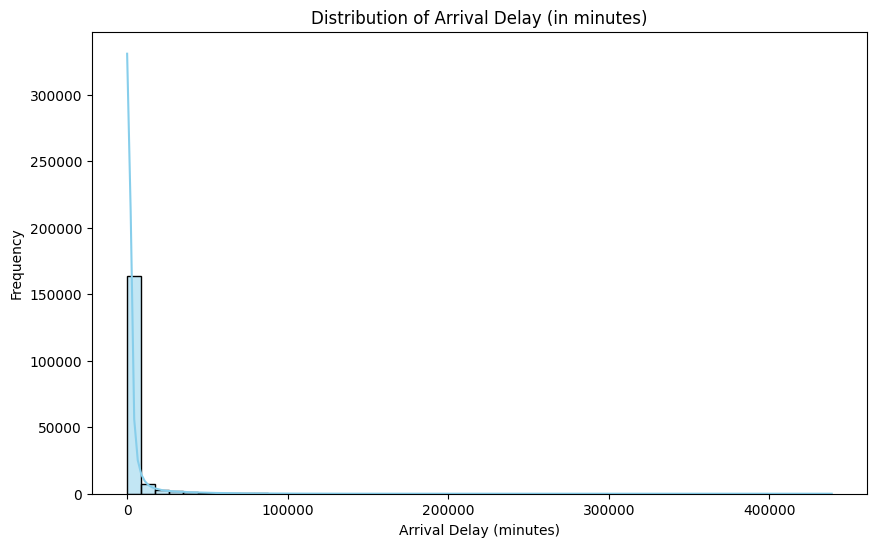

In [6]:
#  EDA - Visualizations and Pattern Analysis

# Distribution of Arrival Delay
plt.figure(figsize=(10, 6))
sns.histplot(df['arr_delay'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Arrival Delay (in minutes)')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

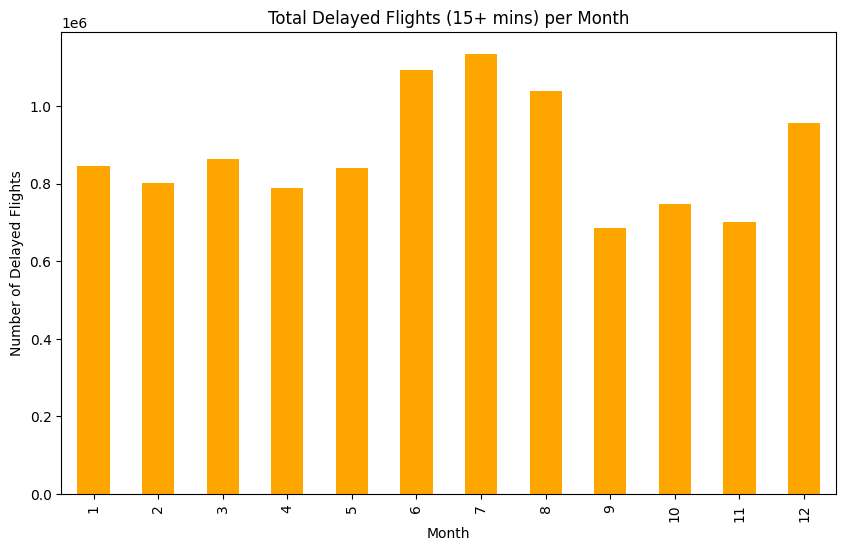

In [7]:

#  Flights delayed by 15+ mins per month
monthly_delay = df.groupby('month')['arr_del15'].sum()
plt.figure(figsize=(10, 6))
monthly_delay.plot(kind='bar', color='orange')
plt.title('Total Delayed Flights (15+ mins) per Month')
plt.xlabel('Month')
plt.ylabel('Number of Delayed Flights')
plt.show()

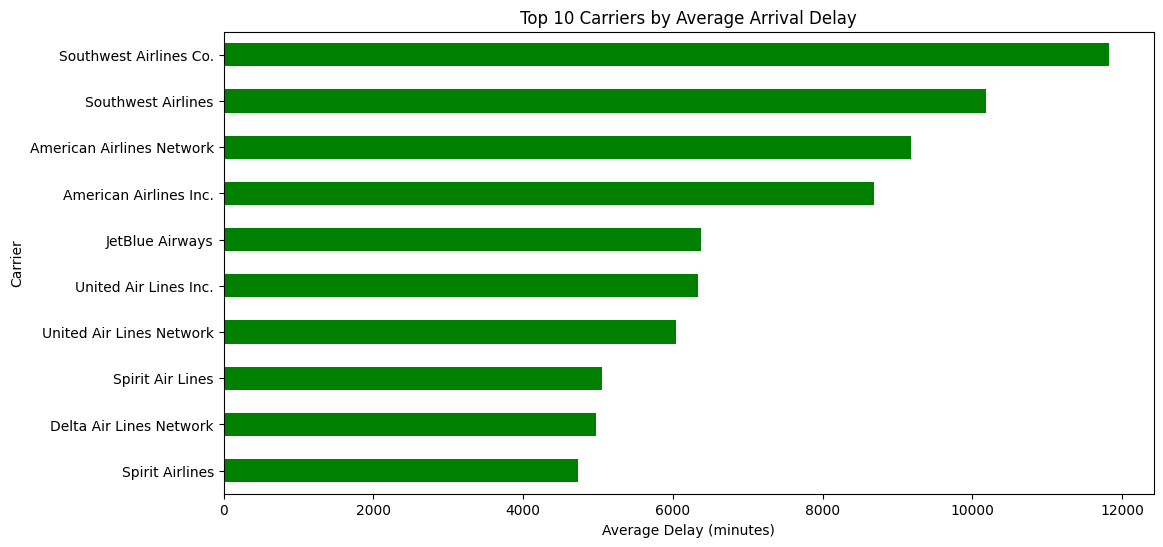

In [8]:

#  Average delay by carrier
carrier_delay_avg = df.groupby('carrier_name')['arr_delay'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
carrier_delay_avg.plot(kind='barh', color='green')
plt.title('Top 10 Carriers by Average Arrival Delay')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Carrier')
plt.gca().invert_yaxis()
plt.show()

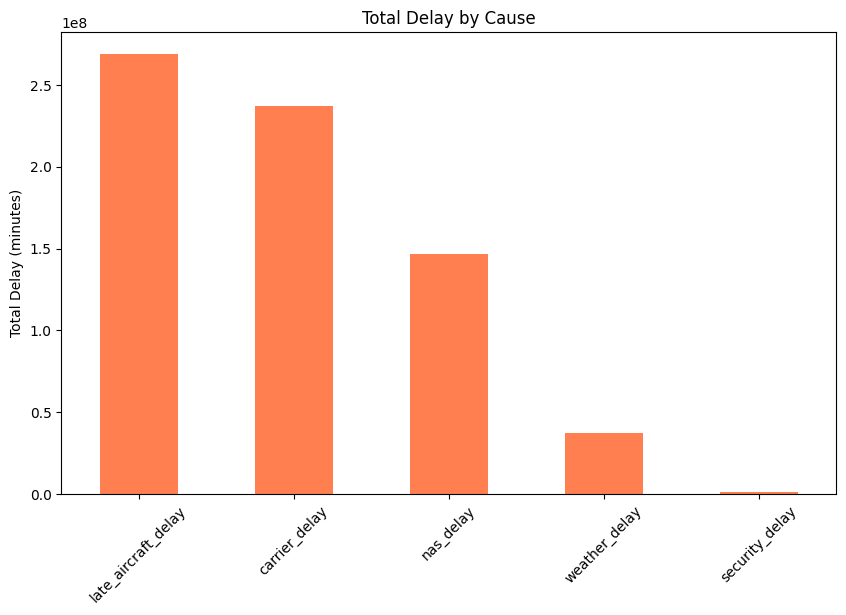

In [9]:
#  Total delay by type (controllable vs uncontrollable)
delay_types = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
delay_totals = df[delay_types].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
delay_totals.plot(kind='bar', color='coral')
plt.title('Total Delay by Cause')
plt.ylabel('Total Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

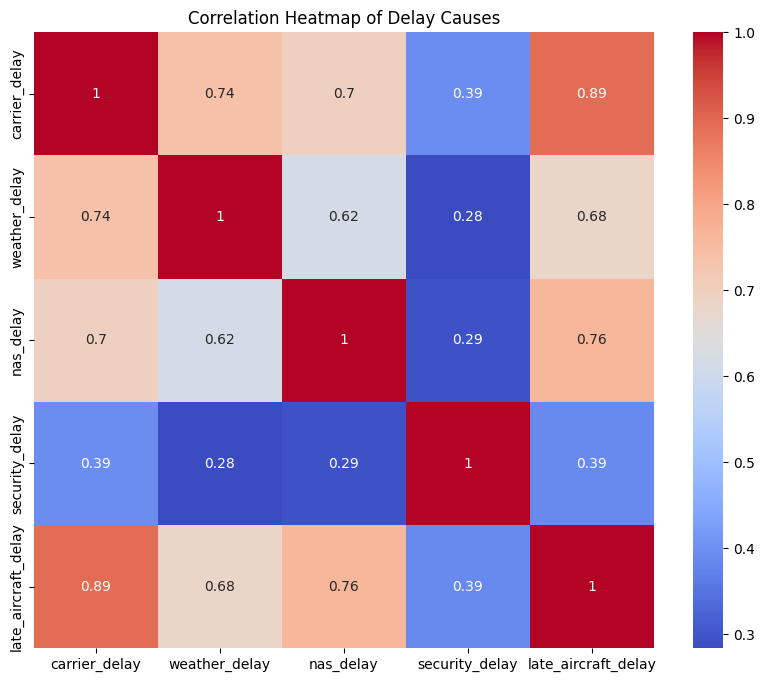

In [10]:
# Heatmap of delay causes correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df[delay_types].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Delay Causes')
plt.show()

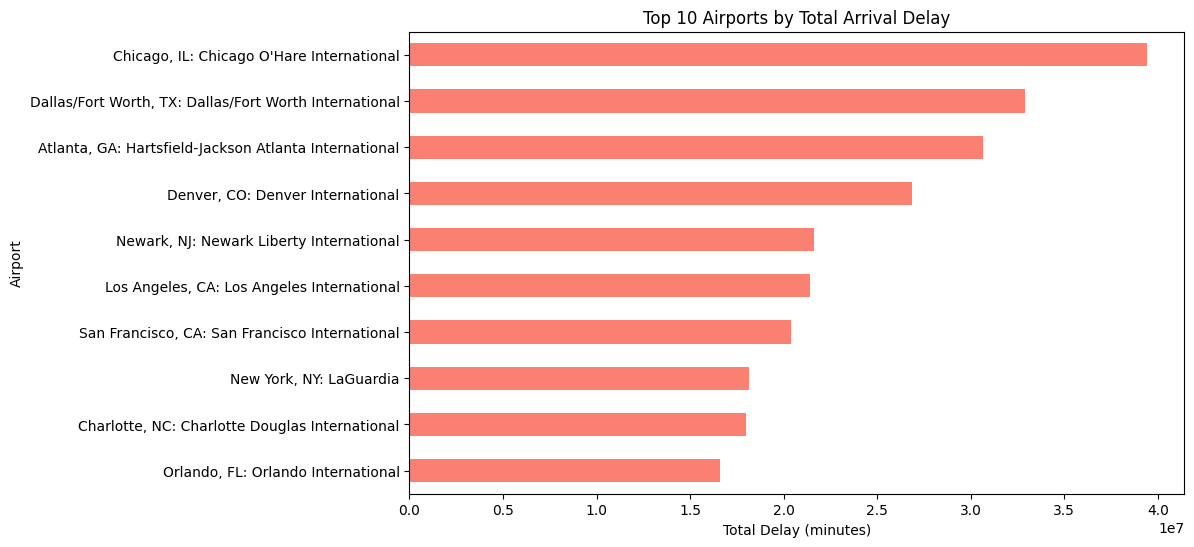

In [11]:
airport_delay = df.groupby('airport_name')['arr_delay'].sum().sort_values(ascending=False).head(10)
airport_delay.plot(kind='barh', figsize=(10, 6), color='salmon')
plt.title('Top 10 Airports by Total Arrival Delay')
plt.xlabel('Total Delay (minutes)')
plt.ylabel('Airport')
plt.gca().invert_yaxis()
plt.show()


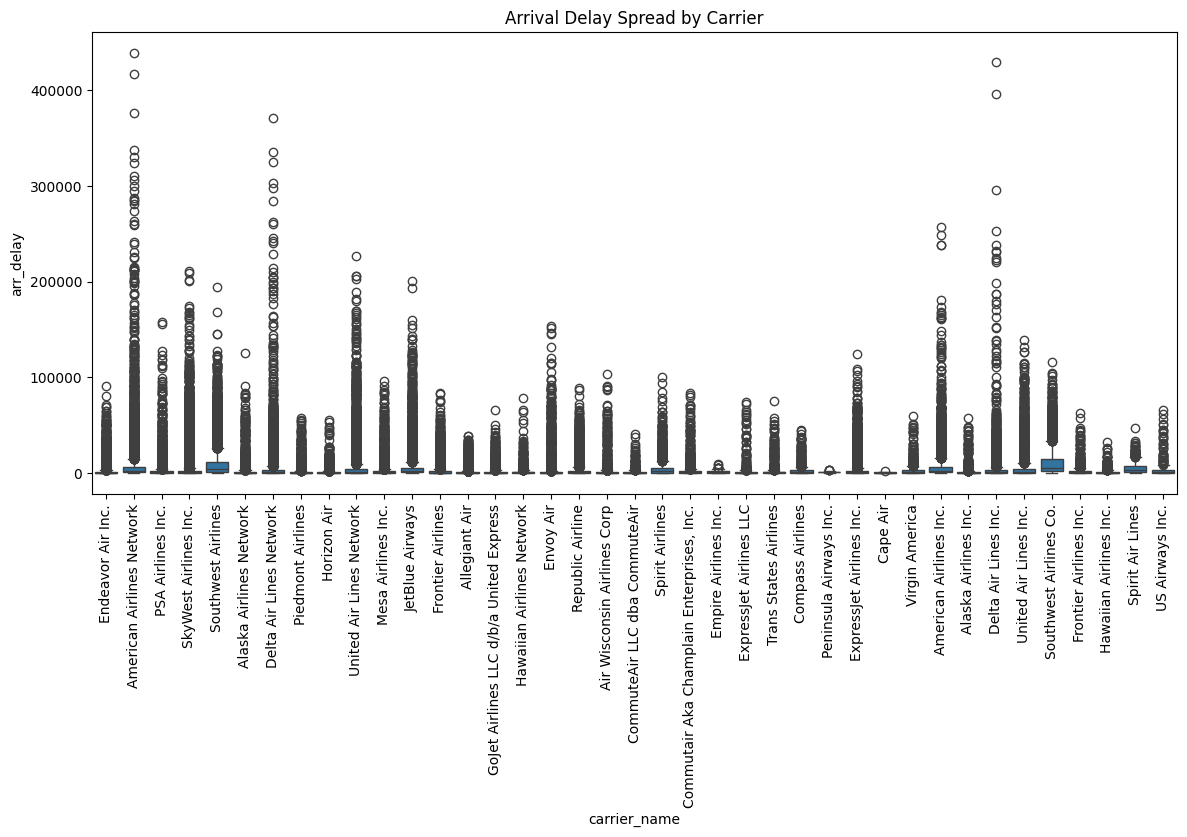

In [12]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='carrier_name', y='arr_delay')
plt.xticks(rotation=90)
plt.title('Arrival Delay Spread by Carrier')
plt.show()


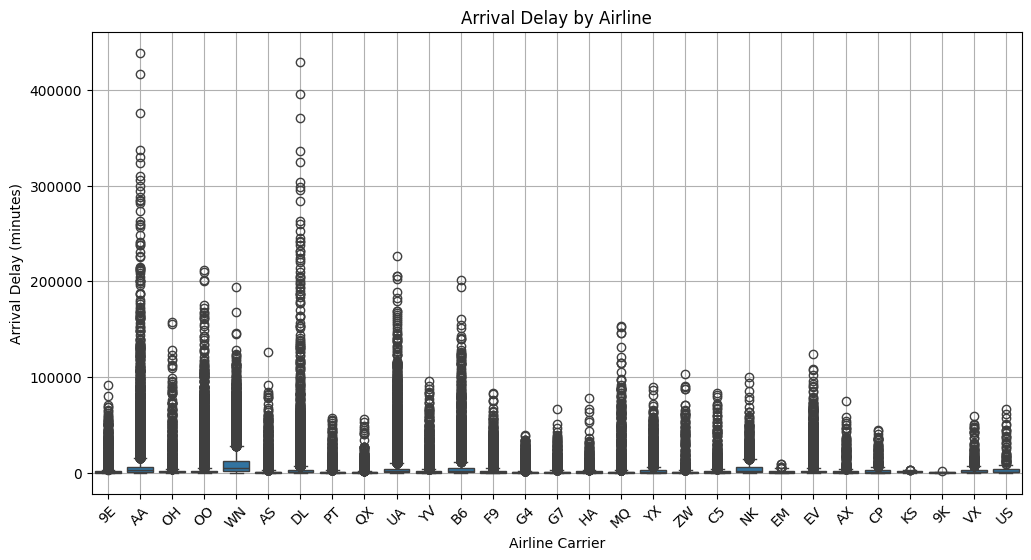

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='carrier', y='arr_delay')
plt.title('Arrival Delay by Airline')
plt.xlabel('Airline Carrier')
plt.ylabel('Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


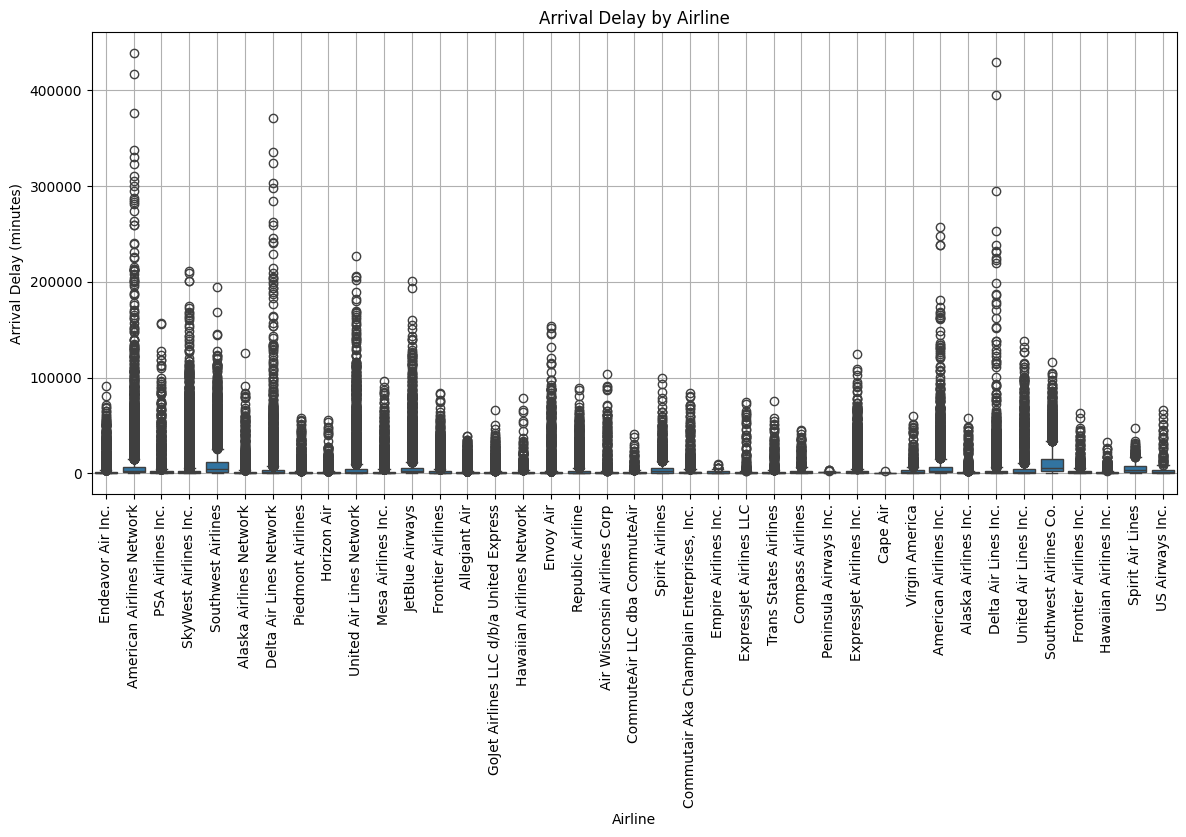

In [14]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='carrier_name', y='arr_delay')
plt.title('Arrival Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Arrival Delay (minutes)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


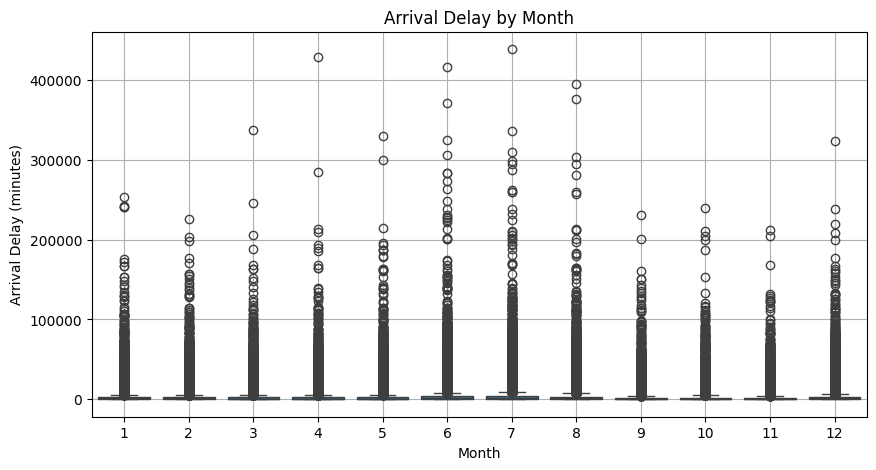

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='month', y='arr_delay')
plt.title('Arrival Delay by Month')
plt.xlabel('Month')
plt.ylabel('Arrival Delay (minutes)')
plt.grid(True)
plt.show()


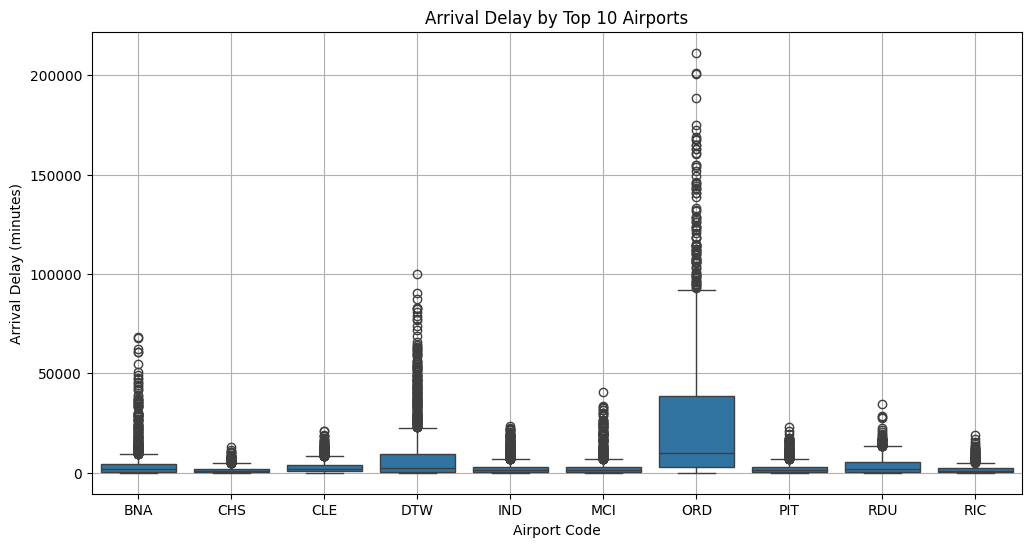

In [16]:
top_airports = df['airport'].value_counts().head(10).index
df_top = df[df['airport'].isin(top_airports)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='airport', y='arr_delay')
plt.title('Arrival Delay by Top 10 Airports')
plt.xlabel('Airport Code')
plt.ylabel('Arrival Delay (minutes)')
plt.grid(True)
plt.show()


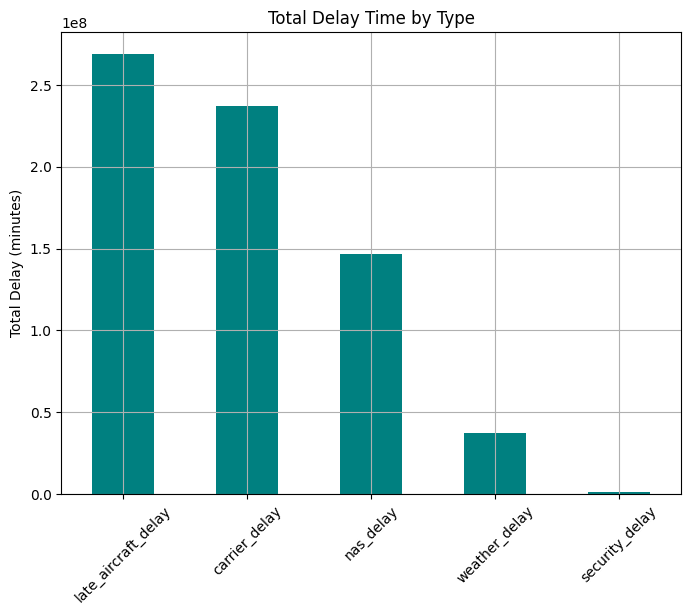

In [17]:
delay_types = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
df_delay_sums = df[delay_types].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
df_delay_sums.plot(kind='bar', color='teal')
plt.title('Total Delay Time by Type')
plt.ylabel('Total Delay (minutes)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


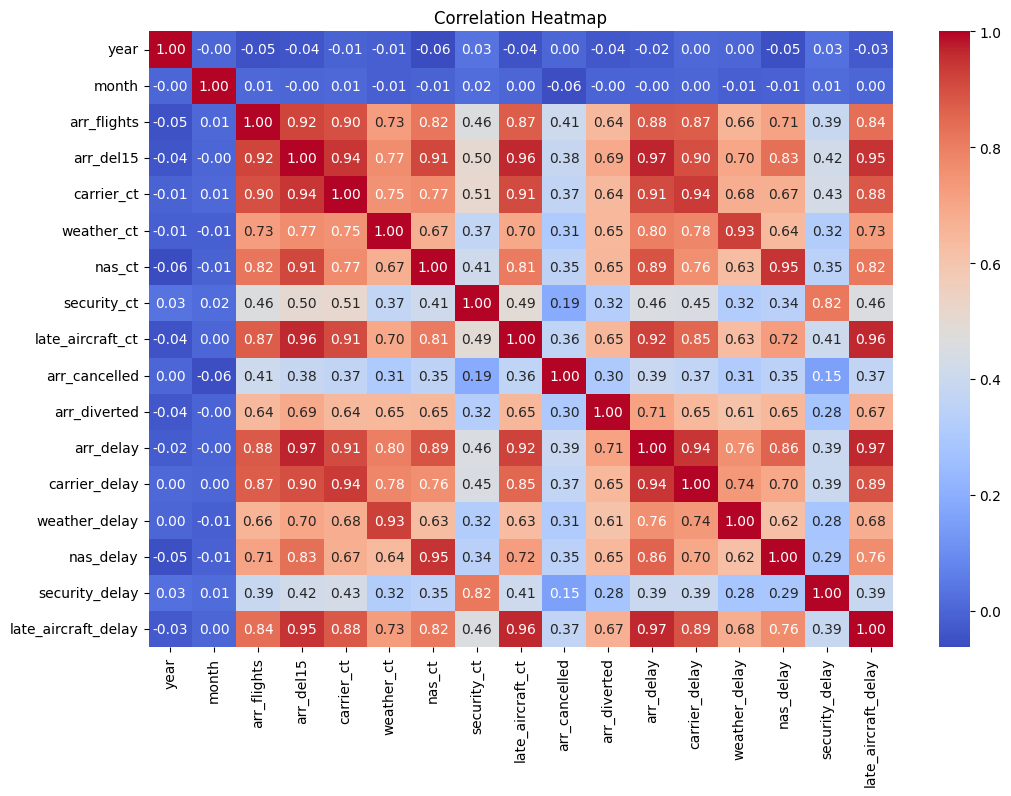

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


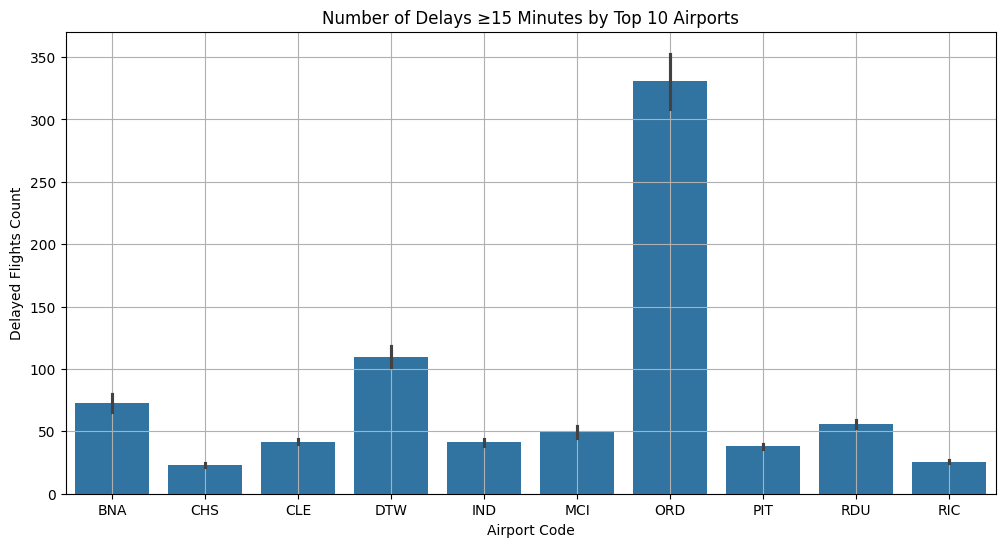

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top, x='airport', y='arr_del15')
plt.title('Number of Delays ≥15 Minutes by Top 10 Airports')
plt.xlabel('Airport Code')
plt.ylabel('Delayed Flights Count')
plt.grid(True)
plt.show()


C:\Users\m5cd2\AppData\Local\Temp\ipykernel_7496\999120362.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Cancelled', 'Diverted'], y=[df['arr_cancelled'].sum(), df['arr_diverted'].sum()], palette='Set2')


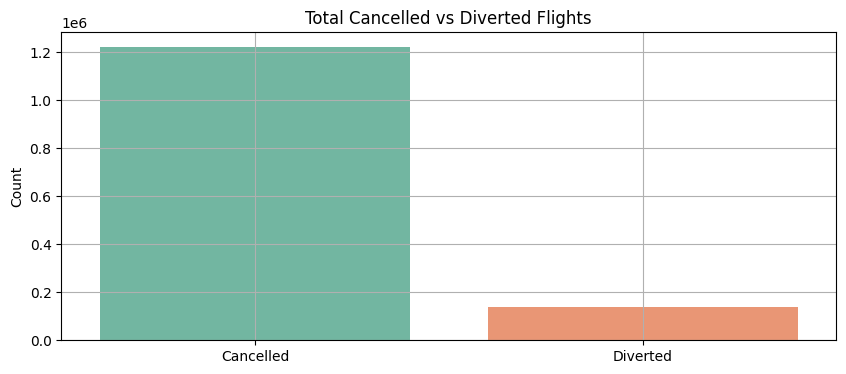

In [20]:
plt.figure(figsize=(10, 4))
sns.barplot(x=['Cancelled', 'Diverted'], y=[df['arr_cancelled'].sum(), df['arr_diverted'].sum()], palette='Set2')
plt.title('Total Cancelled vs Diverted Flights')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [21]:
# Binary target: was there a delay of 15+ mins?
df['is_delayed'] = df['arr_del15'].apply(lambda x: 1 if x > 0 else 0)

# Regression target: actual delay time
# Already exists as: df['arr_delay']


In [22]:
drop_cols = ['arr_del15', 'arr_cancelled', 'arr_diverted', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
df = df.drop(columns=drop_cols)


In [23]:
# Label encode carrier and airport
le = LabelEncoder()
df['carrier_encoded'] = le.fit_transform(df['carrier_name'])
df['airport_encoded'] = le.fit_transform(df['airport'])

# Drop original string columns
df = df.drop(columns=['carrier', 'carrier_name', 'airport', 'airport_name'])


In [26]:
# Make sure 'is_delayed' column exists
df['is_delayed'] = df['arr_delay'].apply(lambda x: 1 if x > 15 else 0)

# Check class distribution
print(df['is_delayed'].value_counts())
print("\nClass Distribution (%):")
print(df['is_delayed'].value_counts(normalize=True) * 100)


is_delayed
1    170036
0      9302
Name: count, dtype: int64

Class Distribution (%):
is_delayed
1    94.813146
0     5.186854
Name: proportion, dtype: float64


In [27]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
safe_features = ['year', 'month', 'carrier_encoded', 'airport_encoded']
X = df[safe_features]
y_class = df['is_delayed']


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,f1_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Combine for sampling
train_df = X_train.copy()
train_df['is_delayed'] = y_train

# Undersample majority class (1 = delayed)
# Separate classes
class_1 = train_df[train_df['is_delayed'] == 1]
class_0 = train_df[train_df['is_delayed'] == 0]

# Undersample class 1 to match class 0 size
class_1_sample = class_1.sample(n=len(class_0), random_state=42)

# Combine balanced classes
balanced_df = pd.concat([class_0, class_1_sample])
X_train_under = balanced_df.drop(columns='is_delayed')
y_train_under = balanced_df['is_delayed']
# Train model
clf_under = RandomForestClassifier(n_estimators=100, random_state=42)
clf_under.fit(X_train_under, y_train_under)

# Evaluate
y_pred_under = clf_under.predict(X_test)
y_proba_under = clf_under.predict_proba(X_test)[:, 1]

print(" Undersampling Results (No Leakage)")
print(classification_report(y_test, y_pred_under))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_under))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_under))
print("F1-Score:", f1_score(y_test, y_pred_under))

 Undersampling Results (No Leakage)
              precision    recall  f1-score   support

           0       0.10      0.68      0.18      1860
           1       0.97      0.68      0.80     34008

    accuracy                           0.68     35868
   macro avg       0.54      0.68      0.49     35868
weighted avg       0.93      0.68      0.77     35868

Confusion Matrix:
 [[ 1262   598]
 [10958 23050]]
ROC-AUC Score: 0.752859431556901
F1-Score: 0.7995698626335507


In [34]:
# Train Random Forest with class_weight
clf_weighted = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf_weighted.fit(X_train, y_train)

# Evaluate
y_pred_weighted = clf_weighted.predict(X_test)
y_proba_weighted = clf_weighted.predict_proba(X_test)[:, 1]

print(" Option A – class_weight='balanced'")
print(classification_report(y_test, y_pred_weighted))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_weighted))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_weighted))
print("F1-Score:", f1_score(y_test, y_pred_weighted))


 Option A – class_weight='balanced'
              precision    recall  f1-score   support

           0       0.28      0.11      0.16      1860
           1       0.95      0.98      0.97     34008

    accuracy                           0.94     35868
   macro avg       0.62      0.55      0.57     35868
weighted avg       0.92      0.94      0.93     35868

Confusion Matrix:
 [[  213  1647]
 [  546 33462]]
ROC-AUC Score: 0.7560717528829396
F1-Score: 0.9682711923260559


In [35]:
y_pred_a = clf_weighted.predict(X_test)
y_pred_b = clf_under.predict(X_test)


In [36]:
from sklearn.metrics import classification_report

# Get detailed classification reports
report_a = classification_report(y_test, y_pred_a, output_dict=True)
report_b = classification_report(y_test, y_pred_b, output_dict=True)

# Take average of precision, recall, and f1 for class 1 (delayed flights)
avg_precision = (report_a['1']['precision'] + report_b['1']['precision']) / 2
avg_recall = (report_a['1']['recall'] + report_b['1']['recall']) / 2
avg_f1 = (report_a['1']['f1-score'] + report_b['1']['f1-score']) / 2

print(" Final Combined Scores:")
print("Precision:", round(avg_precision, 4))
print("Recall:", round(avg_recall, 4))
print("F1-Score:", round(avg_f1, 4))


 Final Combined Scores:
Precision: 0.9639
Recall: 0.8309
F1-Score: 0.8839


In [37]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for both models
acc_a = accuracy_score(y_test, y_pred_a)
acc_b = accuracy_score(y_test, y_pred_b)

# Average accuracy
avg_accuracy = (acc_a + acc_b) / 2

print(" Final Combined Accuracy:", round(avg_accuracy, 4))


 Final Combined Accuracy: 0.8083


In [38]:
y_reg = df['arr_delay']   # continuous delay in minutes


In [39]:
X = df[['year', 'month', 'carrier_encoded', 'airport_encoded']]


In [40]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)


In [41]:
# Step 1: Remove extreme delay values
df_reg_cleaned = df[(df['arr_delay'] < 1000) & (df['arr_delay'].notnull())]

# Step 2: Redefine X and y
X_reg = df_reg_cleaned[['year', 'month', 'carrier_encoded', 'airport_encoded']]
y_reg = df_reg_cleaned['arr_delay']

# Step 3: Split again
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Step 4: Train
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_r, y_train_r)
y_pred_r = reg.predict(X_test_r)

# Step 5: Evaluate
mae = mean_absolute_error(y_test_r, y_pred_r)
rmse = mean_squared_error(y_test_r, y_pred_r, squared=False)

print("Cleaned Regression Results")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))


Cleaned Regression Results
MAE: 208.14
RMSE: 260.73


C:\Users\m5cd2\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [42]:
# OAI Weights ( can tweak these if needed)
OAI_WEIGHTS = {
    'carrier_delay': 1.5,         # controllable
    'late_aircraft_delay': 1.3,   # controllable
    'nas_delay': 1.0,             # semi-controllable
    'weather_delay': 0.5,         # mostly uncontrollable
    'security_delay': 0.2         # rare and uncontrollable
}


In [43]:
# Fill NaNs with 0 in delay components
for col in OAI_WEIGHTS.keys():
    df[col] = df[col].fillna(0)

# Compute OAI as weighted sum
df['oai_score'] = sum(df[col] * weight for col, weight in OAI_WEIGHTS.items())

# View example OAI scores
df[['carrier_delay', 'late_aircraft_delay', 'weather_delay', 'nas_delay', 'security_delay', 'oai_score']].head()


,carrier_delay,late_aircraft_delay,weather_delay,nas_delay,security_delay,oai_score
0,61.0,17.0,574.0,20.0,0.0,420.6
1,252.0,63.0,0.0,33.0,0.0,492.9
2,536.0,276.0,0.0,47.0,0.0,1209.8
3,9.0,66.0,0.0,0.0,0.0,99.3
4,8906.0,10299.0,732.0,1487.0,0.0,28600.7


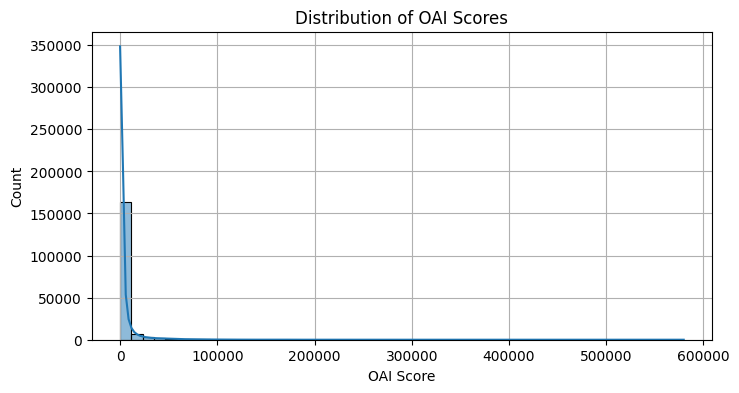

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(df['oai_score'], bins=50, kde=True)
plt.title("Distribution of OAI Scores")
plt.xlabel("OAI Score")
plt.grid(True)
plt.show()


In [45]:
# Show top 10 flights with highest OAI (most controllable delay impact)
df[['arr_delay', 'oai_score'] + list(OAI_WEIGHTS.keys())].sort_values(by='oai_score', ascending=False).head(10)


,arr_delay,oai_score,carrier_delay,late_aircraft_delay,nas_delay,weather_delay,security_delay
9506,438783.0,579684.5,162563.0,227959.0,31163.0,16369.0,729.0
149714,429194.0,537436.4,151581.0,147167.0,107073.0,23334.0,39.0
11379,416577.0,530074.2,118772.0,223306.0,48946.0,25206.0,347.0
157920,395609.0,528530.2,196944.0,129200.0,61036.0,8108.0,321.0
7634,376057.0,504289.6,141614.0,205549.0,20738.0,7619.0,537.0
129402,370937.0,454828.2,108068.0,131666.0,112018.0,19018.0,167.0
9817,335957.0,439877.0,152758.0,118421.0,48958.0,15569.0,251.0
17027,337375.0,435049.2,118554.0,155262.0,47438.0,15718.0,403.0
11696,324572.0,421135.3,140205.0,119365.0,46454.0,18299.0,249.0
22752,323449.0,416850.6,109989.0,158653.0,36628.0,17848.0,331.0


In [46]:
import shap
import matplotlib.pyplot as plt

# Sample just 300 rows from X_test to make it fast
X_shap = X_test.sample(n=300, random_state=42)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(clf_weighted)

# Compute SHAP values (faster)
shap_values = explainer.shap_values(X_shap)


In [47]:
print(type(shap_values))         
print(np.array(shap_values).shape)


<class 'numpy.ndarray'>
(300, 4, 2)


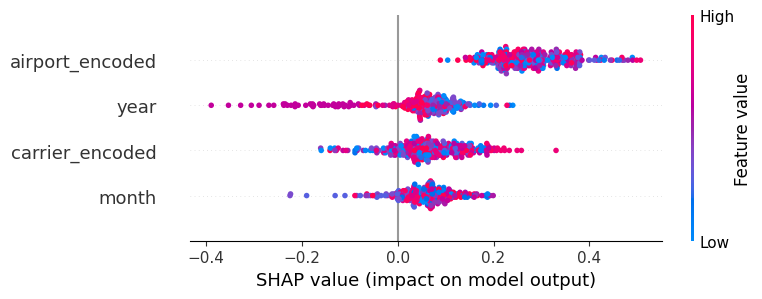

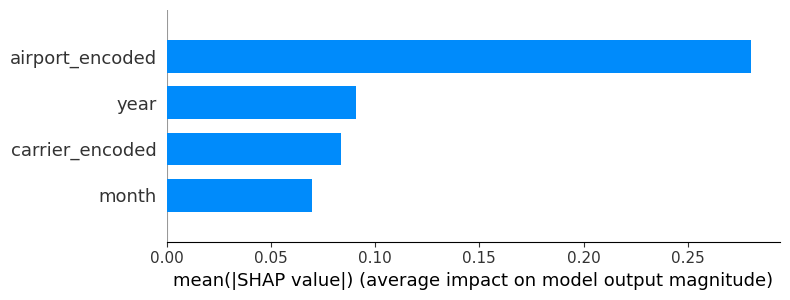

In [48]:

shap_values_class1 = shap_values[:, :, 1]

# Summary plot
shap.summary_plot(shap_values_class1, X_shap, feature_names=X_shap.columns)

# Optional bar plot
shap.summary_plot(shap_values_class1, X_shap, feature_names=X_shap.columns, plot_type='bar')




In [49]:

df_test = df.loc[X_test.index].copy()

# Step 2: Find high-OAI row in sampled X_shap
high_oai_idx = df_test.loc[X_shap.index].sort_values(by='oai_score', ascending=False).index[0]

# Step 3: Get its row position within X_shap
row_pos = X_shap.index.get_loc(high_oai_idx)

# Step 4: Display force plot
shap.initjs()
shap.force_plot(
    explainer.expected_value[1],              # For class 1 (delayed)
    shap_values_class1[row_pos],              # Corrected indexing here
    X_shap.iloc[row_pos]                      # Input row
)


In [50]:
# Create df copy for alignment
df_test = df.loc[X_test.index].copy()

# Find flight with **lowest** OAI score in the SHAP sample
low_oai_idx = df_test.loc[X_shap.index].sort_values(by='oai_score').index[0]

# Get row position
row_pos_low = X_shap.index.get_loc(low_oai_idx)

# Display force plot for this low-OAI flight
shap.initjs()
shap.force_plot(
    explainer.expected_value[1],         # For class 1
    shap_values_class1[row_pos_low],     # SHAP value for that row
    X_shap.iloc[row_pos_low]             # Feature values
)


In [51]:
import shap

# Train SHAP explainer for regression
explainer_reg = shap.TreeExplainer(reg)

# Sample to speed up
X_sample_reg = X_test_r.sample(n=300, random_state=42)

# Get SHAP values
shap_values_reg = explainer_reg.shap_values(X_sample_reg)


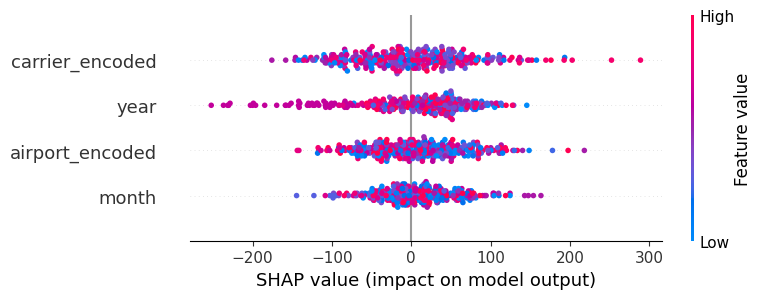

In [55]:
shap.summary_plot(shap_values_reg, X_sample_reg, feature_names=X_sample_reg.columns)


In [56]:
# Pick a row (e.g. index 0) from X_sample_reg
shap.initjs()
shap.force_plot(
    explainer_reg.expected_value,
    shap_values_reg[0],
    X_sample_reg.iloc[0]
)


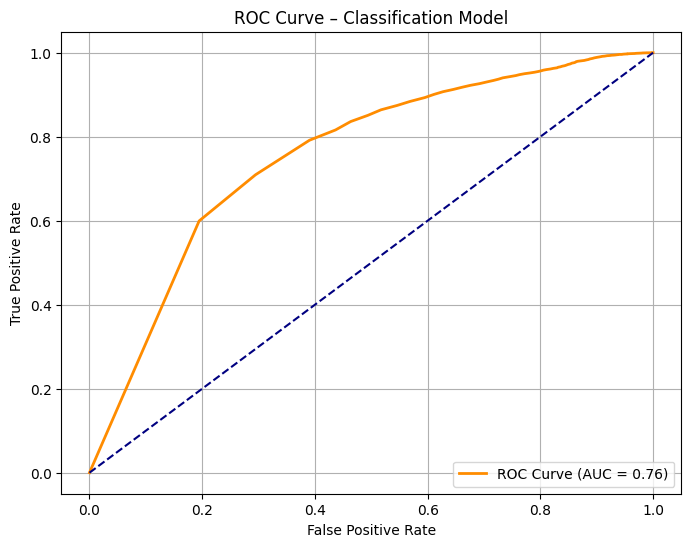

In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1
y_proba = clf_weighted.predict_proba(X_test)[:, 1]

# Compute FPR, TPR
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Classification Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [58]:
print(df.columns.tolist())


['year', 'month', 'arr_flights', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'is_delayed', 'carrier_encoded', 'airport_encoded', 'oai_score']


In [59]:

top_airports_encoded = df.groupby('airport_encoded')['oai_score'].mean().sort_values(ascending=False).head(5)

# Top 5 carriers (encoded) with highest avg OAI
top_carriers_encoded = df.groupby('carrier_encoded')['oai_score'].mean().sort_values(ascending=False).head(5)

print(" Top 5 Airports (encoded) by Avg OAI:")
print(top_airports_encoded)

print("\n Top 5 Carriers (encoded) by Avg OAI:")
print(top_carriers_encoded)


 Top 5 Airports (encoded) by Avg OAI:
airport_encoded
102    32342.242633
271    32223.383489
23     27669.467304
101    26563.685412
197    23060.965258
Name: oai_score, dtype: float64

 Top 5 Carriers (encoded) by Avg OAI:
carrier_encoded
31    15081.412283
30    13219.495591
5     11732.772106
4     10871.031093
23     8179.528592
Name: oai_score, dtype: float64


In [60]:

# # Merge with top results
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load original raw dataset
original_df = pd.read_csv("dataset/Airline_Delay_Cause.csv")

# Create two separate encoders (VERY important!)
le_carrier = LabelEncoder()
le_airport = LabelEncoder()

# Fit encoders
original_df['carrier_encoded'] = le_carrier.fit_transform(original_df['carrier_name'])
original_df['airport_encoded'] = le_airport.fit_transform(original_df['airport'])

# Build lookup tables
carrier_map = pd.DataFrame({
    'carrier_encoded': original_df['carrier_encoded'],
    'carrier_name': original_df['carrier_name']
}).drop_duplicates()

airport_map = pd.DataFrame({
    'airport_encoded': original_df['airport_encoded'],
    'airport_name': original_df['airport_name']
}).drop_duplicates()

# Now merge your top OAI results with readable names
top_airports_named = top_airports_encoded.reset_index().merge(airport_map, on='airport_encoded', how='left')
top_carriers_named = top_carriers_encoded.reset_index().merge(carrier_map, on='carrier_encoded', how='left')

# Show result
print(" Top Airports by Avg OAI (with names):")
print(top_airports_named)

print("\n Top Carriers by Avg OAI (with names):")
print(top_carriers_named)



 Top Airports by Avg OAI (with names):
   airport_encoded     oai_score  \
0              102  32342.242633   
1              271  32223.383489   
2               23  27669.467304   
3              101  26563.685412   
4              197  23060.965258   

                                        airport_name  
0  Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...  
1          Chicago, IL: Chicago O'Hare International  
2  Atlanta, GA: Hartsfield-Jackson Atlanta Intern...  
3                   Denver, CO: Denver International  
4        New York, NY: John F. Kennedy International  

 Top Carriers by Avg OAI (with names):
   carrier_encoded     oai_score               carrier_name
0               31  15081.412283     Southwest Airlines Co.
1               30  13219.495591         Southwest Airlines
2                5  11732.772106  American Airlines Network
3                4  10871.031093     American Airlines Inc.
4               23   8179.528592            JetBlue Airways
